This example shows how to train a SOM to create a 3-dimensional map of handritten digits using the [UCI ML hand-written digits datasets](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

Load and scale the data then train the som:

In [2]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(10, 10, 64, sigma=4, learning_rate=0.5, 
              neighborhood_function='triangle', z = 10)
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.323238675642038


Plot the digits to the 3D map:

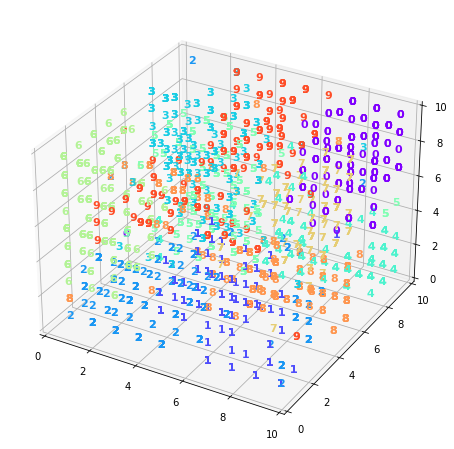

In [3]:
xs = []
ys = []
zs = []
ts = []

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    xs.append(w[0]+.5)
    ys.append(w[1]+.5)
    zs.append(w[2]+.5)
    ts.append(t)
    
for t, x, y, z in zip(ts, xs, ys, zs):
    ax.text(x, y, z, str(t),
            zdir = None, color=plt.cm.rainbow(t / 10.), 
            fontdict={'weight': 'bold',  'size': 11})
    
ax.set_xlim(0, som.get_weights().shape[0])
ax.set_ylim(0, som.get_weights().shape[1])
ax.set_zlim(0, som.get_weights().shape[2])

plt.savefig('resulting_images/som_digts_3d.png')
plt.show()